In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install nltk
!pip install spacy==2.3.5

!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

!pip install pyresparser
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 3.7 MB/s 
     |████████████████████████████████| 1.0 MB 38.2 MB/s 
     |████████████████████████████████| 184 kB 44.8 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.1
    Uninstalling spacy-3.4.1:
      Successfully uninstalled spacy-3.4.1
ERROR: pip's depende

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
from pyresparser import ResumeParser
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
nltk.download('omw-1.4')
pdf_path=['akkghorpade449@gmailDotcom (1).pdf','AdityaSingh[2_2].pdf','Akshattiwari[3_4].pdf','AlokSingh[4_4].pdf','Akshay singh.pdf','AkshathaKeshavPatgar[2_9].pdf','AbhashGaneshan[2_9].pdf']
d=[]
name=[]
email=[] 
mobile=[] 
skill=[]
jd=input("Enter Job description: ")
for i in pdf_path:
  data = ResumeParser(f'/content/{i}').get_extracted_data()  #/content/ABHISHEKSB[3_7].pdf
  name.append(data['name'])
  email.append(data['email'])
  mobile.append(data['mobile_number'])
  skill.append(data['skills'])
  #d.append({"Name":data['name'],"Email":data['email'],"Mobile":data['mobile_number'],"Skills":data['skills']})
df=pd.DataFrame({"Name":name,"Email":email,"Mobile":mobile,"Skills":skill})
stemmer = SnowballStemmer("english")
df['Skills'] = df['Skills'].apply(lambda x: [stemmer.stem(y) for y in x])
lmtzr = WordNetLemmatizer()
df['Skills'] = df['Skills'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
df['Skills']=[','.join(map(str,l)) for l in df['Skills']]
skil_data=df['Skills'].to_numpy().tolist()
skil_data1=[]
for d in skil_data:
  if jd in d:
    skil_data1.append(d)
skil_data1.insert(0,jd)
model1 = SentenceTransformer('bert-base-nli-mean-tokens')
#Encoding:
sen_embeddings1 = model1.encode(skil_data1)
model2 = SentenceTransformer('stsb-bert-base')
#Encoding:
sen_embeddings2 = model2.encode(skil_data1)
f1=cosine_similarity(
    [sen_embeddings1[0]],
    sen_embeddings1[1:]
)
f2=cosine_similarity(
    [sen_embeddings2[0]],
    sen_embeddings2[1:]
)
df=df[df['Skills'].isin(skil_data1)]
df['bert_similarty']=f1[0]
df['sbert_similarty']=f2[0]
df

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Enter Job description: network


/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_training' (0.0.0) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Name,Email,Mobile,Skills,bert_similarty,sbert_similarty
2,AKSHAT TIWARI,akshattiwari011@gmail.com,7985906023,"c,databas,iso,linux,shell,script,visual,startu...",0.246274,0.161521
5,AKSHATHA KESHAV,akshathapatgar76@gmail.com,8105810662,"c,administr,sql,cloud,databas,linux,train,comp...",0.266126,0.233372


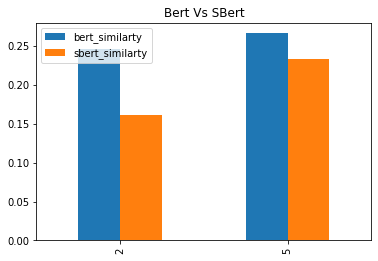

In [ ]:
df.plot.bar(title="Bert Vs SBert")